In [2]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [3]:
#hide
from fastbook import *

In [4]:
from fastai.vision.all import *

In [5]:
path = untar_data(URLs.PETS)/'images'

In [14]:
def is_cat(x) :
  return x[0].isupper()

dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224)
)

In [15]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1) # 미세조정

epoch,train_loss,valid_loss,error_rate,time
0,0.156117,0.031245,0.013532,01:37


epoch,train_loss,valid_loss,error_rate,time
0,0.047441,0.019345,0.006766,01:22


In [17]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/'images'),
    label_func = lambda o : path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,3.039383,2.174364,00:02


epoch,train_loss,valid_loss,time
0,1.737887,1.531193,00:01
1,1.542118,1.221791,00:01
2,1.386109,0.988693,00:01
3,1.255308,0.935231,00:01
4,1.135728,0.846957,00:01
5,1.026152,0.753290,00:01
6,0.939932,0.720898,00:01
7,0.870335,0.723099,00:01


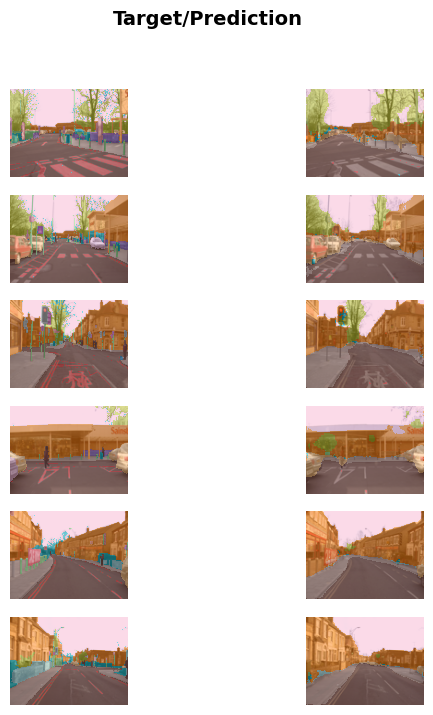

In [18]:
learn.show_results(max_n=6, figsize=(7,8))

In [19]:
from fastai.text.all import *

# 영화 리뷰에 실린 감정을 더 잘 분류하는 모델을 언등ㄹ 수 있음
dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

/usr/local/lib/python3.10/dist-packages/fastai/text/learner.py:149: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  wgts = torch.load(wgts_fname, map_location = lambda storage

epoch,train_loss,valid_loss,accuracy,time
0,0.457946,0.422231,0.810080,03:16


epoch,train_loss,valid_loss,accuracy,time
0,0.311222,0.260453,0.895400,06:52
1,0.254960,0.227497,0.910720,06:52
2,0.192453,0.193151,0.928680,06:50
3,0.150675,0.195663,0.928760,06:52


In [20]:
learn.predict('I really liked that movie!!') # 모델은 해당 리뷰를 긍정적이라고 판단함


('pos', tensor(1), tensor([6.6800e-05, 9.9993e-01]))